## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt



In [74]:
import requests

target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

response = requests.get(target_url)
data = response.text

# 把文件的資料讀進 data 中


print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [75]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)

# 處理資料的分割，分隔每一個 row

print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [98]:
import pandas as pd

arrange_data = []
for d in data:
    line = d.split("\t")
    arrange_data.append(line)
    
    # 讀取每一列的資料，做 row 中的資料分割

df = pd.DataFrame(arrange_data)

# 把資料用 DataFrame 結構化
df.head(10)


,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


# 快速作法 : 直接用 pandas 讀取網路連結

In [77]:
## 注意：一行中的分隔符號有時候為 "," (預設), 但也常常是 tab (\t)
## 如果非 "," 的話，記得要加上參數告訴 pd.read_csv
## 建議你/妳可以把 sep 的參數抽掉試看看

df_lazy = pd.read_csv(target_url, sep="\t", header=None)

In [78]:
df_lazy.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

(435, 499, 3)


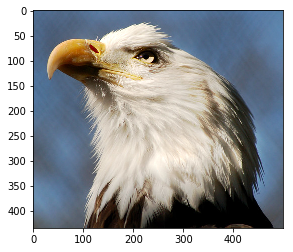

In [95]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


first_link = df.loc[0,1]

# 讀取第 0 列，第 1 欄的資料

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))
img = np.array(img)
print(img.shape)

# 把圖片放進 array中，並且用 shape 給他刻度

plt.imshow(img)
plt.show()

In [93]:
def img2arr_fromURLs(url_list, resize = False):
    
    
    img_list =[]
    
    
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256))
                
                # 假如 resize, 就先統一到 256 x 256
                
            img = np.array(img)
            img_list.append(img)
        except:
            pass
            
            # 只有在 response.status_code 為 200 時，才可以取得圖片，若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
    
    
    return img_list

Total images that we got: 4 


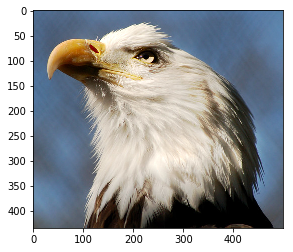

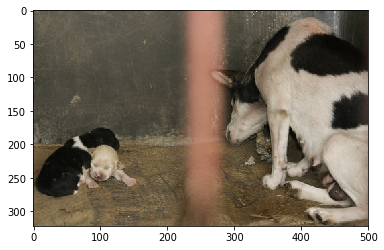

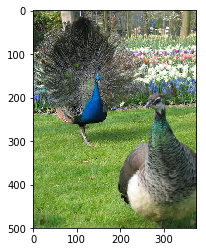

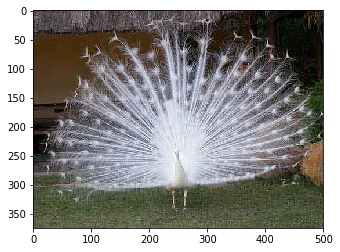

In [94]:
## 沒有做 resize

result = img2arr_fromURLs(df[0:5][1].values)
# 取圖片的位置 row, column

print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

Total images that we got: 4 


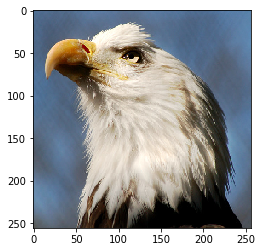

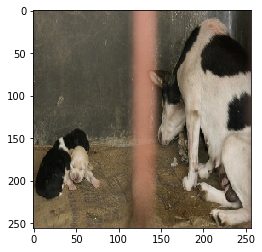

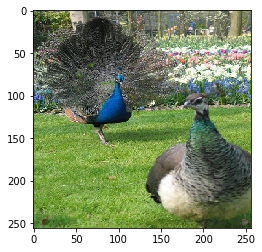

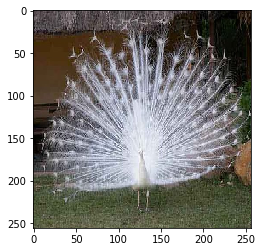

In [97]:
## 做 resize

result = img2arr_fromURLs(df[0:5][1].values, resize = True)
# 取圖片的位置 row, column

print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()